In [1]:
import sys
sys.path.append('/home/user304/users/jiwon/PAI_EYEPACS/source')

In [15]:
!tree -d ../dataset
!ls ../dataset/
from ipywidgets import interact
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import glob
import cv2
import tqdm
from utils import imgread , find_boundary
from sklearn.model_selection import StratifiedKFold
import glob
from ipywidgets import interact
warnings.filterwarnings(action='ignore')


../dataset
├── cut_image
├── CUT_IMAGES
├── IMAGES
├── original_zip_file
└── tfrecord

5 directories
cut_image   data_label.csv  make_classifier.csv  original_zip_file
CUT_IMAGES  IMAGES	    messidor_data.csv	 tfrecord


In [3]:
df = pd.read_csv('../dataset/data_label.csv')

In [4]:
df.tail()

,image_id,target,fold,type
1739,IM004806.jpg,0,5,train
1740,IM004811.jpg,0,5,train
1741,IM004812.jpg,1,2,train
1742,IM004831.jpg,0,4,train
1743,IM004832.jpg,0,5,train


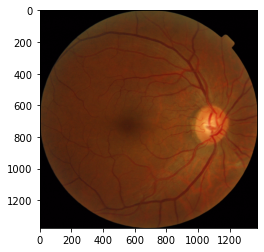

In [5]:
img_path = df['image_id'][0]
data_dir = '../dataset/IMAGES/'
img_gray = imgread(os.path.join(data_dir , img_path) ,to_gray= True)
img = imgread(os.path.join(data_dir , img_path) )

_ , b_img = cv2.threshold(img_gray, -1, 255, cv2.THRESH_BINARY_INV|cv2.THRESH_OTSU)

CenterX = b_img.shape[1] // 2
CenterY = b_img.shape[0] // 2
X = b_img[CenterY , :]
Y = b_img[: , CenterX]
X_count, Y_count = (X == 0).sum() ,(Y == 0).sum()
idx_X = find_boundary(X)
idx_Y = find_boundary(Y)

img = img[idx_Y: (idx_Y + Y_count), idx_X : (idx_X + X_count)]
plt.imshow(img)
plt.show()

In [9]:
df

,image_id,target,fold,type
0,20051020_43808_0100_PP.png,0,5,train
1,20051020_43832_0100_PP.png,0,2,train
2,20051020_43882_0100_PP.png,0,4,train
3,20051020_43906_0100_PP.png,1,1,val
4,20051020_44261_0100_PP.png,0,2,train
...,...,...,...,...
1739,IM004806.jpg,0,5,train
1740,IM004811.jpg,0,5,train
1741,IM004812.jpg,1,2,train
1742,IM004831.jpg,0,4,train


In [10]:
next(iter(df.iterrows()))

(0,
 image_id    20051020_43808_0100_PP.png
 target                               0
 fold                                 5
 type                             train
 Name: 0, dtype: object)

In [11]:
for _ , row in df.iterrows():
    print(row['image_id'])

20051020_43808_0100_PP.png


In [27]:
os.makedirs('../dataset/CUT_IMAGES' ,  exist_ok= True)
data_dir = '../dataset/IMAGES/'

for _ , row in tqdm.tqdm(df.iterrows()):
    # read grayimg , img 
    img_path = row['image_id']
    data_path = os.path.join(data_dir , img_path)
    img_gray = imgread(data_path ,to_gray= True)
    img = imgread(os.path.join(data_dir , img_path) )
    
    # cvt grayimg 2 binary_img
    _ , b_img = cv2.threshold(img_gray, -1, 255, cv2.THRESH_BINARY_INV|cv2.THRESH_OTSU)
    
    # cutting
    CenterX = b_img.shape[1] // 2
    CenterY = b_img.shape[0] // 2
    # 중간 slicing
    X = b_img[CenterY , :]
    Y = b_img[: , CenterX]
    X_count, Y_count = (X == 0).sum() ,(Y == 0).sum()
    # 경계 찾기
    idx_X = find_boundary(X)
    idx_Y = find_boundary(Y)
    cut_img = img[idx_Y: (idx_Y + Y_count), idx_X : (idx_X + X_count)]
    
    cut_img = cv2.cvtColor(cut_img , cv2.COLOR_BGR2RGB)
    cv2.imwrite(f'../dataset/CUT_IMAGES/{img_path}' , cut_img)

1744it [03:02,  9.53it/s]


In [28]:
image_list = os.listdir('../dataset/CUT_IMAGES')

In [29]:
@interact(index=(0, len(image_list) - 1))
def show_sample(index = 0):
    image_file = image_list[index]
    image_path = '../dataset/CUT_IMAGES/' + image_file
    image = imgread(image_path)

    plt.figure(figsize=(6,6))
    plt.imshow(image)
    plt.show()


interactive(children=(IntSlider(value=0, description='index', max=1743), Output()), _dom_classes=('widget-inte…